In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def nek_5k_mem(msh_size,order,dim):
    mem = msh_size*((order+1)**dim)*400*8
    mem = mem/(10**9)
    print('Total memory required is', mem, 'GB')
    print('Number of processors required, assuming 1024 MB of run-time memory per processor', mem/1.024)

In [5]:
def gp_sum_calc(a,r,n):
    S = a*(1-(r**n))/(1-r)
    print S

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int S)? (<ipython-input-5-8bfebe617998>, line 3)

In [ ]:
def calc_int_subr(U,L,nu):
    eta = (((nu**3)*L)/(U**3))**(0.25)
    Re = (U*L)/nu
    lamda = np.sqrt(10)*(Re**(0.75))*eta
    print lamda

Kolmogrov Scale : $\eta = \frac {\nu^{3}L}{U^{3}}$


Inertial subrange : $ \lambda = \sqrt{10}(Re_{L})^{0.75} \eta$

$\rho_{air} = 1.225$

$\mu_{air} = 0.000018375$

Re = 2000, 6000, 9000

Confinement Ratios : Unconfined, 10, 5, 3

Slot width = 0.01 m

For LES as recommended by Pierre Sagaut

$\Delta x^{+}$ = 50 (Streamwise)

$\Delta z^{+}$ = 1   (Wall Normal)

$\Delta y^{+}$ = 10  (Spanwise)



For unconfined/conf_Ratio 10

X = 1 m

Y = 0.1 m

Z = 0.2 m

Re = 2000

In [23]:
tot_x_plus = 0.0052434
tot_z_plus = 0.0008896
tot_y_plus = 0.0009347
X = 1
Z = 0.1
Y = 0.2
x_cells = X/tot_x_plus
y_cells = Y/tot_y_plus
z_cells = Z/tot_z_plus
print(x_cells,y_cells,z_cells)

(190.715947667544, 213.97239756071468, 112.41007194244604)


In [24]:
round(tot_x_plus)

0.0

In [25]:
print('Total cells required',(x_cells*y_cells*z_cells))
msh_size = x_cells*y_cells*z_cells
nek_5k_mem(msh_size,8,3)

('Total cells required', 4587224.435194264)
('Total memory required is', 10701.07716242118, 'GB')
('Number of processors required, assuming 1024 MB of run-time memory per processor', 10450.270666426934)


In [26]:
gp_sum_calc(tot_x_plus/1.0,1.001,x_cells/3)

0.343979315098


In [27]:
(tot_x_plus/1)*(1.001**((x_cells/3)-1))

0.0055817975175801015

In [29]:
gp_sum_calc(0.00559,1.057,x_cells/10)

0.18421323395


In [30]:
gp_sum_calc(tot_y_plus/1.0,0.93,y_cells/3)

0.0132774091226


In [6]:
print('Total cells required',(83*(y_cells/2)*z_cells))
msh_size = 83*y_cells*z_cells
nek_5k_mem(msh_size,8,3)

('Total cells required', 998185.0830451504)
('Total memory required is', 4657.132323455453, 'GB')
('Number of processors required, assuming 1024 MB of run-time memory per processor', 4547.980784624466)


In [8]:
U = 3
L = 0.01
nu = 1.5e-05
eta = (((nu**3)*L)/(U**3))**(0.25)
print eta
Re = (U*L)/nu
print Re
lamda = np.sqrt(10)*(Re**(0.75))*eta
lamda

3.34370152488e-05
2000.0


0.031622776601683798

/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


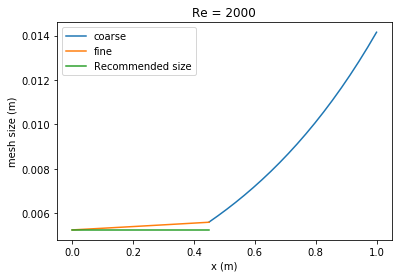

In [9]:
b1_a = tot_x_plus
b1_r = 1.001
b1_n = round(x_cells/3) + 1
x = np.linspace(0,0.45,b1_n)
x_run = np.linspace(1,b1_n,b1_n)
s1 = []
for n in x_run:
    temp = b1_a*((b1_r)**(n-1))
    s1.append(temp)
b2_a = 0.00560
b2_r = 1.05
b2_n = round(x_cells/10) + 1
x2 = np.linspace(0.45,1,b2_n)
x2_run = np.linspace(1,b2_n,b2_n)
s2 = []
for n in x2_run:
    temp = b2_a*((b2_r)**(n-1))
    s2.append(temp)
x_plus = np.linspace(0.0052434,0.0052434,b1_n)
plt.plot(x2,s2,label='coarse')
plt.plot(x,s1,label='fine')
plt.plot(x,x_plus,label='Recommended size')
plt.xlabel('x (m)')
plt.ylabel('mesh size (m)')
plt.title('Re = 2000')
plt.legend()
plt.show()

Re = 4000

In [31]:
tot_x_plus = 0.0027548
tot_z_plus = 0.0000467
tot_y_plus = 0.0004911
X = 1
Z = 0.1
Y = 0.2
x_cells = X/tot_x_plus
y_cells = Y/tot_y_plus
z_cells = Z/tot_z_plus
print(x_cells,y_cells,z_cells)

(363.002758820967, 407.2490327835472, 2141.3276231263385)


In [32]:
print('Total cells required',(x_cells*(y_cells/2)*z_cells))
msh_size = x_cells*y_cells*z_cells
nek_5k_mem(msh_size,8,3)

('Total cells required', 158278931.93532985)
('Total memory required is', 738466.184837475, 'GB')
('Number of processors required, assuming 1024 MB of run-time memory per processor', 721158.3836303466)


In [33]:
gp_sum_calc(tot_x_plus/1.0,1.007,x_cells/2.8)

0.578631669746


In [34]:
(tot_x_plus/1)*(1.007**((x_cells/2.8)-1))

0.0067579162743036745

In [35]:
gp_sum_calc(0.0067579,1.05,x_cells/10)

0.659205276858


In [39]:
x_cells_new = round((x_cells/2)+(x_cells/10)+1)
print('Total cells required',(x_cells_new*(y_cells/10)*z_cells))
msh_size = x_cells_new*(y_cells/10)*z_cells
nek_5k_mem(msh_size,8,3)

('Total cells required', 19097973.914260566)
('Total memory required is', 44551.75354718704, 'GB')
('Number of processors required, assuming 1024 MB of run-time memory per processor', 43507.57182342485)


In [372]:
U = 6
L = 0.01
nu = 0.000015
eta = (((nu**3)*L)/(U**3))**(0.25)
print eta
Re = (U*L)/nu
print Re
lamda = (Re**(0.75))*eta
lamda

1.98817682192e-05
4000.0


0.009999999999999998

/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


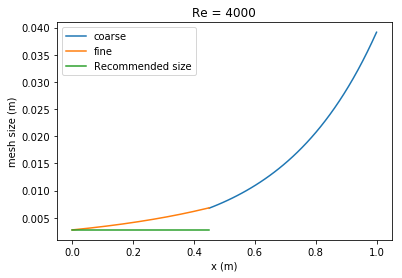

In [327]:
b1_a = tot_x_plus
b1_r = 1.007
b1_n = round(x_cells/2.8) + 1
x = np.linspace(0,0.45,b1_n)
x_run = np.linspace(1,b1_n,b1_n)
s1 = []
for n in x_run:
    temp = b1_a*((b1_r)**(n-1))
    s1.append(temp)
b2_a = 0.0067579
b2_r = 1.05
b2_n = round(x_cells/10) + 1
x2 = np.linspace(0.45,1,b2_n)
x2_run = np.linspace(1,b2_n,b2_n)
s2 = []
for n in x2_run:
    temp = b2_a*((b2_r)**(n-1))
    s2.append(temp)
x_plus = np.linspace(0.0027548,0.0027548,b1_n)
plt.plot(x2,s2,label='coarse')
plt.plot(x,s1,label='fine')
plt.plot(x,x_plus,label='Recommended size')
plt.xlabel('x (m)')
plt.ylabel('mesh size (m)')
plt.title('Re = 4000')
plt.legend()
plt.show()

Re = 6000

In [40]:
tot_x_plus = 0.0018904
tot_z_plus = 0.0000320
tot_y_plus = 0.0003370
X = 1
Z = 0.1
Y = 0.2
x_cells = X/tot_x_plus
y_cells = Y/tot_y_plus
z_cells = Z/tot_z_plus
print(x_cells,y_cells,z_cells)

(528.9885738468049, 593.4718100890208, 3125.0000000000005)


In [41]:
print('Total cells required',(x_cells*y_cells*z_cells))
msh_size = x_cells*y_cells*z_cells
nek_5k_mem(msh_size,8,3)

('Total cells required', 981061895.1164781)
('Total memory required is', 2288621.18892772, 'GB')
('Number of processors required, assuming 1024 MB of run-time memory per processor', 2234981.629812226)


In [42]:
gp_sum_calc(tot_x_plus/1.0,1.0045,x_cells/3.2)

0.462348432649


In [43]:
(tot_x_plus/1)*(1.0045**((x_cells/3.2)-1))

0.003953178643025942

In [44]:
gp_sum_calc(0.0039531,1.0045,x_cells/4.3)

0.647721936892


In [45]:
l = calc_int_subr(9,0.01,1.5e-05)
print l

0.0316227766017
None


In [46]:
x_cells_new = round((x_cells/3.2)+(x_cells/4.3)+1)
print('Total cells required',(x_cells_new*y_cells*z_cells))
msh_size = x_cells_new*(y_cells/10)*z_cells
nek_5k_mem(msh_size,8,3)

('Total cells required', 535979228.486647)
('Total memory required is', 125033.23442136498, 'GB')
('Number of processors required, assuming 1024 MB of run-time memory per processor', 122102.76798961424)


/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


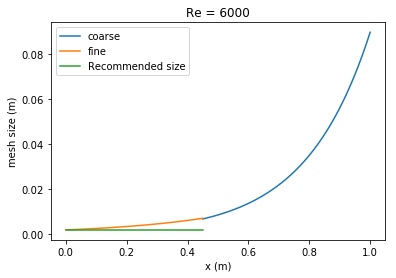

In [318]:
b1_a = tot_x_plus
b1_r = 1.007
b1_n = round(x_cells/2.8) + 1
x = np.linspace(0,0.45,b1_n)
x_run = np.linspace(1,b1_n,b1_n)
s1 = []
for n in x_run:
    temp = b1_a*((b1_r)**(n-1))
    s1.append(temp)
b2_a = 0.0067579
b2_r = 1.05
b2_n = round(x_cells/10) + 1
x2 = np.linspace(0.45,1,b2_n)
x2_run = np.linspace(1,b2_n,b2_n)
s2 = []
for n in x2_run:
    temp = b2_a*((b2_r)**(n-1))
    s2.append(temp)
x_plus = np.linspace(0.0018904,0.0018904,b1_n)
plt.plot(x2,s2,label='coarse')
plt.plot(x,s1,label='fine')
plt.plot(x,x_plus,label='Recommended size')
plt.xlabel('x (m)')
plt.ylabel('mesh size (m)')
plt.title('Re = 6000')
plt.legend()
plt.show()

Re = 8000

In [335]:
tot_x_plus = 0.0018904
tot_z_plus = 0.0000245
tot_y_plus = 0.0002580
X = 1
Z = 0.1
Y = 0.2
x_cells = X/tot_x_plus
y_cells = Y/tot_y_plus
z_cells = Z/tot_z_plus
print(x_cells,y_cells,z_cells)

(528.9885738468049, 775.1937984496125, 4081.632653061225)


In [336]:
print('Total cells required',(x_cells*y_cells*z_cells))
msh_size = x_cells*y_cells*z_cells
nek_5k_mem(msh_size,8,3)

('Total cells required', 1673749640.39489)
('Total memory required is', 3904523.161113199, 'GB')
('Number of processors required, assuming 1024 MB of run-time memory per processor', 3813010.899524608)


In [337]:
gp_sum_calc(tot_x_plus/1.0,1.0055,x_cells/3.8)

0.393844805409


In [338]:
(tot_x_plus/1)*(1.0055**((x_cells/3.8)-1))

0.004034357463698607

In [344]:
gp_sum_calc(0.004034,1.01,x_cells/5)

0.75251889991


In [347]:
x_cells_new = round((x_cells/3.8)+(x_cells/5)+1)
print('Total cells required',(x_cells_new*y_cells*z_cells))
msh_size = x_cells_new*y_cells*z_cells
nek_5k_mem(msh_size,8,3)

('Total cells required', 778357854.7698151)
('Total memory required is', 1815753.2036070244, 'GB')
('Number of processors required, assuming 1024 MB of run-time memory per processor', 1773196.4878974848)


/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  
/home/adutta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


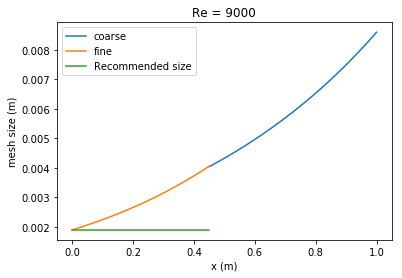

In [346]:
b1_a = tot_x_plus
b1_r = 1.0055
b1_n = round(x_cells/3.8) + 1
x = np.linspace(0,0.45,b1_n)
x_run = np.linspace(1,b1_n,b1_n)
s1 = []
for n in x_run:
    temp = b1_a*((b1_r)**(n-1))
    s1.append(temp)
b2_a = 0.004034
b2_r = 1.01
b2_n = round(x_cells/7) + 1
x2 = np.linspace(0.45,1,b2_n)
x2_run = np.linspace(1,b2_n,b2_n)
s2 = []
for n in x2_run:
    temp = b2_a*((b2_r)**(n-1))
    s2.append(temp)
x_plus = np.linspace(0.0018904,0.0018904,b1_n)
plt.plot(x2,s2,label='coarse')
plt.plot(x,s1,label='fine')
plt.plot(x,x_plus,label='Recommended size')
plt.xlabel('x (m)')
plt.ylabel('mesh size (m)')
plt.title('Re = 9000')
plt.legend()
plt.show()

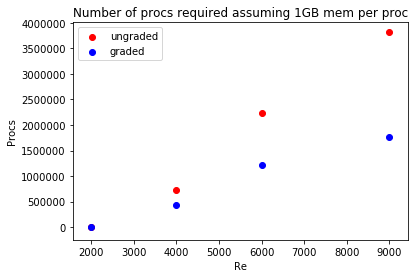

In [355]:
x_re = np.asarray([2000,4000,6000,9000])
proc_nos_ung = np.asarray([10450,721158,2234981,3813010])
proc_nos_g = np.asarray([4548,435075,1221027,1773196])
plt.scatter(x_re,proc_nos_ung,color='red',label='ungraded')
plt.scatter(x_re,proc_nos_g,color='blue',label='graded')
plt.xlabel('Re')
plt.ylabel('Procs')
plt.title('Number of procs required assuming 1GB mem per proc')
plt.legend()
plt.show()

For confinement ratio 3

Re = 2000

X = 1
Z = 0.03
Y = 0.2

In [1]:
tot_x_plus = 0.0052434
tot_z_plus = 0.0008896
tot_y_plus = 0.0009347
X = 1
Z = 0.03
Y = 0.2
x_cells = X/tot_x_plus
y_cells = Y/tot_y_plus
z_cells = Z/tot_z_plus
print(x_cells,y_cells,z_cells)

190.715947667544 213.97239756071468 33.72302158273381


In [6]:
print('Total cells required',(x_cells*y_cells*z_cells))
msh_size = x_cells*y_cells*z_cells
nek_5k_mem(msh_size,8,3)

Total cells required 1376167.330558279
Total memory required is 3210.3231487263533 GB
Number of processors required, assuming 1024 MB of run-time memory per processor 3135.0811999280795


Re = 4000

In [15]:
tot_x_plus = 0.00826431
tot_z_plus = 0.0002908
tot_y_plus = 0.0116344
X = 1
Z = 0.03
Y = 0.2
x_cells = X/tot_x_plus
y_cells = Y/tot_y_plus
z_cells = Z/tot_z_plus
print(x_cells,y_cells,z_cells)

121.00223733136825 17.190400880148527 103.16368638239338


In [16]:
print('Total cells required',(x_cells*y_cells*z_cells))
msh_size = x_cells*y_cells*z_cells
nek_5k_mem(msh_size,8,3)

Total cells required 214588.4078873205
Total memory required is 500.59183791954126 GB
Number of processors required, assuming 1024 MB of run-time memory per processor 488.859216718302
